In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm.notebook import tqdm_notebook
import numpy as np
import pandas as pd

In [ ]:
origin_data = pd.read_excel("/content/drive/MyDrive/2023_멘토링(word2vec)/Shuffled_Data_10만.xlsx")

In [ ]:
origin_data[:5]

,domain,mt,ko
0,ICT,"Recognition information (QR code, PDA barcode,...","웨어러블 디바이스의 본체부의 디스플레이부에서는 인식 정보(QR코드, PDA 바코드 ..."
1,전자,"Among them, oxide semiconductors including zin...","그중에서도, 산화 아연을 비롯한 산화물 반도체는 기존의 비정질 실리콘에 비해 전자 ..."
2,ICT,The accelerometer signal provides a reading of...,상기 가속도계 신호는 그 모바일 디바이스 상에 작동한 G-포스에 대한 리딩을 제공한다.
3,전자,"However, in some embodiments of the present in...","다만, 본 발명의 일부 실시예에서는 리듬 게임 제공 장치(100)가 도 1과 다르게..."
4,전자,"The input terminals 933, 938, 943 and 948 may ...","입력 단자(933, 938, 943, 948)는 제 1 스위치(920)에 연결될 수..."


In [ ]:
re_data=origin_data[:20000]

In [ ]:
re_data[:5]

,domain,mt,ko
0,ICT,"Recognition information (QR code, PDA barcode,...","웨어러블 디바이스의 본체부의 디스플레이부에서는 인식 정보(QR코드, PDA 바코드 ..."
1,전자,"Among them, oxide semiconductors including zin...","그중에서도, 산화 아연을 비롯한 산화물 반도체는 기존의 비정질 실리콘에 비해 전자 ..."
2,ICT,The accelerometer signal provides a reading of...,상기 가속도계 신호는 그 모바일 디바이스 상에 작동한 G-포스에 대한 리딩을 제공한다.
3,전자,"However, in some embodiments of the present in...","다만, 본 발명의 일부 실시예에서는 리듬 게임 제공 장치(100)가 도 1과 다르게..."
4,전자,"The input terminals 933, 938, 943 and 948 may ...","입력 단자(933, 938, 943, 948)는 제 1 스위치(920)에 연결될 수..."


In [ ]:
re_data.to_excel('/content/drive/MyDrive/2023_멘토링(word2vec)/기술과학_Data_2만.xlsx', index=False) 

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/2023_멘토링(word2vec)/기술과학_Data_2만_완.xlsx")

In [ ]:
data = data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(data))

20000


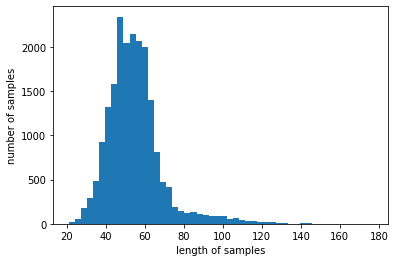

In [ ]:
# 리뷰 길이 분포 확인
import matplotlib.pyplot as plt

plt.hist([len(s) for s in list(data['summary'])], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
import re
data['summary'] = [re.sub('[^A-Za-z0-9가-힣]', '', s) for s in data['summary']]

In [ ]:
data[:20]

,domain,summary
0,ICT,웨어러블디바이스의본체부의디스플레이부에서는인식정보코드바코드등가표시된다
1,전자,그중에서도산화아연을비롯한산화물반도체는기존의비정질실리콘에비해전자이동도가높기때문에활발히...
2,ICT,상기가속도계신호는그모바일디바이스상에작동한포스에대한리딩을제공한다
3,전자,다만본발명의일부실시예에서는리듬게임제공장치가도과다르게구성될수도있다
4,전자,입력단자는제스위치에연결될수있다
5,기계,에의해광학현미경을훨씬능가하는깊은초점깊이를갖는사진을얻을수있다
6,의학,이러한소견을바탕으로말초호산구수가증가할경우감별진단에서악성종양뿐만아니라기생충감염과같은기...
7,ICT,이러한방식으로합성된신호의편광성분도위상분리되어제내지제출력단으로출력된다
8,전자,격벽스페이서는유기발광소자의유기발광층형성공정에서사용되는마스크와접촉한다
9,ICT,제서브절연막은필라에인접하여형성될수있다


In [ ]:
print(len(data))

20000


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 45.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm 

명사보다는 띄어쓰기가 더 잘 나옴

해당 형태소 분석기를 okt 말고 다른 걸로도 진행해볼 것!

In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '조', '대해', '는', '도', '수', '때문', '중', '을', '등', '다만', '에서는']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(data['summary']):
    tokenized_sentence = okt.morphs(sentence, stem=True) 
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 20000/20000 [07:49<00:00, 42.56it/s]


In [ ]:
tokenized_data[:5] # 상위 5개 출력

[['웨어',
  '러블',
  '디바이스',
  '본체',
  '부의',
  '디스플레이',
  '부',
  '인식',
  '정보',
  '코드',
  '바코드',
  '표시',
  '되다'],
 ['그',
  '에서도',
  '산화',
  '아연',
  '비롯',
  '산화물',
  '반도체',
  '기존',
  '비정질',
  '실리콘',
  '비다',
  '전자',
  '동도',
  '높다',
  '활발하다',
  '연구',
  '되다'],
 ['상기',
  '가속도계',
  '신호',
  '그',
  '모바일',
  '디바이스',
  '상',
  '작동',
  '포스',
  '대한',
  '리딩',
  '제공',
  '다'],
 ['본',
  '발명',
  '일부',
  '실시',
  '예',
  '리듬게임',
  '제공',
  '장',
  '치가',
  '과다르',
  '게',
  '구성',
  '되다',
  '있다'],
 ['입력', '단자', '제', '스위치', '연결', '되다']]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, negative = 20, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(5348, 100)

In [ ]:
print(model.wv.most_similar("디바이스", topn = 7))

[('프로세서', 0.9890051484107971), ('서버', 0.9821397066116333), ('모드', 0.981977105140686), ('인터페이스', 0.9816247224807739), ('네트워크', 0.9813312292098999), ('통신', 0.9742302298545837), ('기지국', 0.9742275476455688)]


# 모델 저장 및 벡터들 불러오기

In [ ]:
model.save("kor_summary_word2vec.model")

In [ ]:
vocabs = model.wv.vocab.keys()
vocabs

dict_keys(['웨어', '러블', '디바이스', '본체', '부의', '디스플레이', '부', '인식', '정보', '코드', '바코드', '표시', '되다', '그', '에서도', '산화', '아연', '비롯', '산화물', '반도체', '기존', '비정질', '실리콘', '비다', '전자', '동도', '높다', '활발하다', '연구', '상기', '가속도계', '신호', '모바일', '상', '작동', '포스', '대한', '제공', '다', '본', '발명', '일부', '실시', '예', '장', '치가', '과다르', '게', '구성', '있다', '입력', '단자', '제', '스위치', '연결', '에의', '해', '훨씬', '하', '깊다', '초점', '깊이', '갖다', '사진', '얻다', '이러하다', '소견', '바탕', '말초', '호산구', '가증', '가하다', '경우', '에서', '악성종양', '뿐', '만', '아니다', '기생충', '감염', '같다', '고려', '강조', '방식', '합성', '편광', '성분', '위상', '분리', '되어다', '내지', '제출', '력', '단', '출력', '페이', '서다', '유기', '발광', '소', '자의', '층', '형성', '공정', '사용', '마스크', '접촉', '서브', '절연', '막다', '필라', '인접', '여', '위암', '수술', '후', '심리', '사회', '적응', '영향', '미치다', '요인', '외상', '적', '정서', '조절', '유의', '한양', '상관관계', '보이다', '기', '인슐린', '투여', '거나', '결', '쉬다', '선호', '선택', '이다', '유연성', '발열', '특성', '우수하다', '탄소섬유', '패치', '고자', '특히', '최근', '크기', '전체', '무게', '줄이다', '중요하다', '안정', '수행', '성', '향상', '시키다', '정상', '환기', '준치', '보다'

In [ ]:
word_vectors_list = [model.wv[v] for v in vocabs]

In [ ]:
df_model = pd.DataFrame(list(model.wv.vocab.items()), columns=['word', 'vector'])
df_model['vector'] = word_vectors_list
df_model

,word,vector
0,웨어,"[-0.0021815056, -0.20604779, 0.18192178, -0.21..."
1,러블,"[0.011475463, -0.1927528, 0.20608732, -0.20874..."
2,디바이스,"[-0.07058957, -0.015154436, -0.4644115, -0.571..."
3,본체,"[0.05494403, -0.2477086, 0.3494995, -0.3412062..."
4,부의,"[0.106851436, -0.23087226, 0.62708414, -0.5976..."
...,...,...
5343,스테인리스강,"[0.017880851, -0.10170082, 0.1587565, -0.08235..."
5344,범죄,"[0.030669302, -0.10359679, 0.1643088, -0.07015..."
5345,전달효소,"[0.025428459, -0.121890716, 0.16235891, -0.080..."
5346,파이프라인,"[0.016312862, -0.054033805, 0.06938847, -0.045..."


In [ ]:
df_model.to_excel('/content/drive/MyDrive/2023_멘토링(word2vec)/kor_sum_vectors_arr.xlsx')

In [ ]:
arr = np.zeros((5348, 100))
for idx, vector in enumerate(df_model['vector'].values):
    arr[idx, :] = vector

In [ ]:
arr.shape

(5348, 100)

In [ ]:
np.save('/content/drive/MyDrive/2023_멘토링(word2vec)/kor_sum_vectors_arr', arr)